In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [58]:
dataset = pd.read_csv('/content/forestfires.csv')
dataset.head()

,temp,RH,month,day,wind,area
0,18.0,42,jul,tue,2.7,0.36
1,21.7,38,sep,tue,2.2,0.43
2,21.9,39,sep,mon,1.8,0.47
3,23.3,31,aug,wed,4.5,0.55
4,21.2,51,aug,fri,8.9,0.61


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    99 non-null     float64
 1   RH      99 non-null     int64  
 2   month   99 non-null     object 
 3   day     99 non-null     object 
 4   wind    99 non-null     float64
 5   area    99 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


In [60]:
dataset.describe

<bound method NDFrame.describe of     temp  RH month  day  wind    area
0   18.0  42   jul  tue   2.7    0.36
1   21.7  38   sep  tue   2.2    0.43
2   21.9  39   sep  mon   1.8    0.47
3   23.3  31   aug  wed   4.5    0.55
4   21.2  51   aug  fri   8.9    0.61
..   ...  ..   ...  ...   ...     ...
94  18.7  43   sep  tue   2.7  103.39
95  24.3  36   sep  tue   3.1  105.66
96  17.7  25   sep  sat   3.1  154.88
97  19.6  41   aug  sun   5.8  196.48
98  18.2  46   sep  sat   1.8  200.94

[99 rows x 6 columns]>

In [61]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [62]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = ct.fit_transform(dataset.iloc[:, :-1])

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(79, 18)

In [200]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [201]:
y_pred = multi_regressor.predict(X_test)

In [202]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[ -6.21118649   7.89864798 -28.90746177   0.87066361   6.93150686
 -14.46592194   7.6690275   26.21472424  -6.33932979  -1.8302403
  21.8997038   24.71834165 -15.55331719  -9.18322467 -13.71193349
  -2.11686639  -0.54092279   0.54261855]
67.87497179649085


In [203]:
print(multi_regressor.predict([[1,0,0,160000,130000,300000,0, 0, 1, 0, 0, 0, 8.2, 51, 6.7, 0, 0, 0]]))

[-3300006.93890041]


In [204]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: -0.07531968809152301


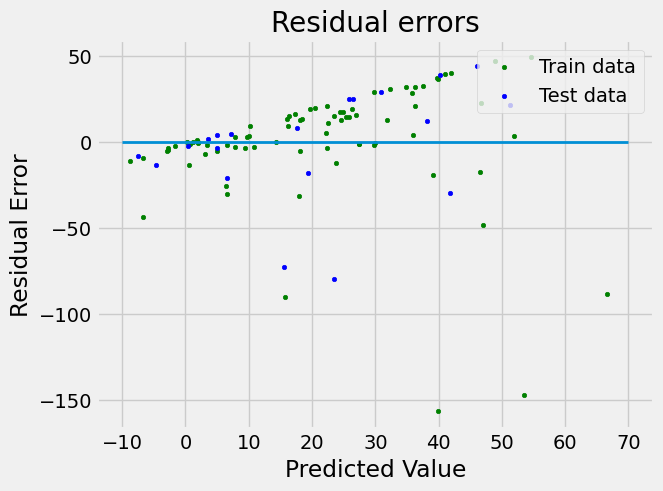

In [205]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train) - y_train,color="green", s=10, label='Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test) - y_test,color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=-10, xmax=70, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.xlabel("Predicted Value")
plt.ylabel("Residual Error")
plt.show()

In [206]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 23.191132678478603
MSE: 994.1570732071253
RMSE: 31.53025647227002


**Test size=0.1 random state=0**

MAE: 32.86440077268232

MSE: 1729.0191263471963

RMSE: 41.581475759611955

**Test size=0.1 random state=42**

MAE: 43.0595096092306

MSE: 4403.245813289822

RMSE: 66.3569575349098

**Test size=0.1 random state=55**

MAE: 39.88140754703828

MSE: 4052.5193315469905

RMSE: 63.659400967547526

**Test size=0.2 random state=0**

MAE: 23.191132678478603

MSE: 994.1570732071253

RMSE: 31.53025647227002

**Test size=0.2 random state=42**

MAE: 31.401303925473666

MSE: 2469.8850945117674

RMSE: 49.69793853382419

**Test size=0.2 random state=55**

MAE: 25.92687272394182

MSE: 2184.779128682857

RMSE: 46.74162094624936

**Test size=0.3 random state=0**

MAE: 26.049891162258458

MSE: 1808.0669670243726

RMSE: 42.52137070961345

**Test size=0.3 random state=42**

MAE: 29.506281260530695

MSE: 1871.3152530442096

RMSE: 43.25870147200688

**Test size=0.3 random state=55**

MAE: 26.234733269809116

MSE: 2083.6420619722526

RMSE: 45.646928286274125


**POLYNOMIAL REGRESSION**

In [225]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [226]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [227]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [228]:
print('MAE:', metrics.mean_absolute_error(y_test, y_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

MAE: 409.30528859439914
MSE: 800598.7780680304
RMSE: 894.7618555057152


Degree 1

MAE: 23.191132676477515

MSE: 994.1570731779157

RMSE: 31.530256471806815

Degree 2

MAE: 90.39240433638192

MSE: 17429.332757478303

RMSE: 132.02019829358804

Degree 3

MAE: 409.30528859439914

MSE: 800598.7780680304

RMSE: 894.7618555057152

Degree 4

MAE: 983.8980484983

MSE: 12293614.682413053

RMSE: 3506.2251328762463